In [1]:
import numpy as np
import tensorflow as tf
import matplotlib 
from matplotlib import pyplot as plt
from __future__ import division
import seaborn as sns
import pandas as pd

In [2]:
data = pd.read_excel("../data/fire_theft.xls")
m = len(data)
n_features = 1

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [3]:
data.head()

,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


### Train LinearRegression model using Batch GD

step0, theta0=0.003, theta1=0.055, cost=796.161
step2000, theta0=1.285, theta1=2.105, cost=225.030
step4000, theta0=2.378, theta1=2.050, cost=219.036
step6000, theta0=3.395, theta1=1.999, cost=213.847
step8000, theta0=4.342, theta1=1.951, cost=209.355
step10000, theta0=5.222, theta1=1.906, cost=205.467
step12000, theta0=6.041, theta1=1.865, cost=202.101
step14000, theta0=6.804, theta1=1.827, cost=199.187
step16000, theta0=7.513, theta1=1.791, cost=196.664
step18000, theta0=8.173, theta1=1.758, cost=194.481
step20000, theta0=8.787, theta1=1.727, cost=192.591
step22000, theta0=9.358, theta1=1.698, cost=190.954
step24000, theta0=9.889, theta1=1.671, cost=189.538
step26000, theta0=10.384, theta1=1.646, cost=188.312
step28000, theta0=10.844, theta1=1.623, cost=187.250
step30000, theta0=11.272, theta1=1.602, cost=186.331
step32000, theta0=11.670, theta1=1.582, cost=185.536
step34000, theta0=12.041, theta1=1.563, cost=184.847
step36000, theta0=12.386, theta1=1.546, cost=184.251
step38000, the

/Users/80151/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))
/Users/80151/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2446: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


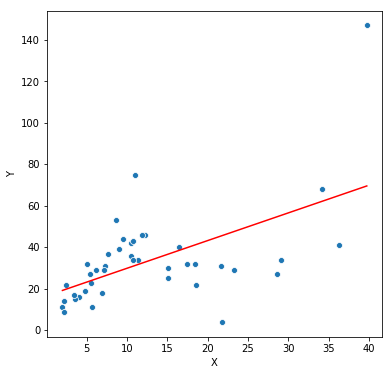

In [8]:
X = tf.placeholder(name='X', dtype=tf.float32, shape=[None, n_features])
Y = tf.placeholder(name='Y', dtype=tf.float32, shape=[None, 1])

theta0 = tf.Variable(0.0, name='theta0')
theta1 = tf.Variable(0.0, name='theta1')

y_pred = theta0 + theta1 * X

cost_function = (1.0/(2.0*m))*(tf.reduce_sum(tf.pow(y_pred - Y, 2)))
cost_summary = tf.summary.scalar(tensor=cost_function, name='cost_summary')

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001).minimize(cost_function)
feed_dict = {
    X : data['X'].values.reshape(-1, 1),
    Y : data['Y'].values.reshape(-1, 1)
}

with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graphs/lab_problem1/cost_summary')
    
    sess.run(tf.global_variables_initializer())
    
    total_step = 100000
    for step in range(total_step):
        sess.run(optimizer, feed_dict)
        
        summary = sess.run(cost_summary, feed_dict)
        writer.add_summary(summary, step)
        
        if(step % 2000 == 0):
            tt0 = sess.run(theta0)
            tt1 = sess.run(theta1)
            cost = sess.run(cost_function, feed_dict)
            print(f"step{step}, theta0={tt0:.3f}, theta1={tt1:.3f}, cost={cost:.3f}")
    
    plt.figure(figsize=(6,6))
    sns.scatterplot(data=data, x='X', y='Y')
    sns.lineplot(data['X'], y=sess.run(y_pred, feed_dict).flatten(), c='r')